In [1]:
# TODO
# 1) create loop for training models
# 2) test model and calculate IOU

Import Libraries

In [1]:
import shutil
import zipfile
import os
import ultralytics
import numpy as np
import pandas as pd
from ultralytics import YOLO
import torch
import cv2

Define Hyperparameters

In [2]:
step_size = 200
EPOCHS = 1
# Determine device to use (GPU if available, otherwise CPU)
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Unzip dataset

In [9]:
# Zip dataset
# Define the paths
dataset_folder = 'excavator_dataset_YOLO'  # The folder you want to zip
dataset_path ="C:/Users/hal3k/OneDrive/Desktop/UNI/Bachelorarbeit/code_explanations/backup/"
output_zip = os.path.join(dataset_path,'YOLO_dataset.zip')  # The output zip file
if not os.path.exists(output_zip):
        print(f"Data path {output_zip} does not exist")
else:
       print(f"Data path {output_zip} does exist") 
# Create the zip file
shutil.make_archive(output_zip.replace('.zip', ''), 'zip', dataset_folder)

print(f"Dataset folder '{dataset_folder}' has been zipped successfully into '{output_zip}'.")

Data path C:/Users/hal3k/OneDrive/Desktop/UNI/Bachelorarbeit/code_explanations/backup/YOLO_dataset.zip does exist
Dataset folder 'excavator_dataset_YOLO' has been zipped successfully into 'C:/Users/hal3k/OneDrive/Desktop/UNI/Bachelorarbeit/code_explanations/backup/YOLO_dataset.zip'.


In [10]:

# Unzip Dataset
zip_path = "YOLO_dataset.zip"
extract_path = "{}{}".format("excavator_dataset_YOLO2", os.sep)

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Open the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extract all contents
    zip_ref.extractall(extract_path)

print(f"Extracted to {extract_path}")

Extracted to excavator_dataset_YOLO2\


Convert Dataset to appropriate format


In [6]:
# base_path = "{}{}".format("excavator_dataset_YOLO", os.sep)
# train_images_path = "{}{}{}".format("images", os.sep, "train")
# train_images_path = os.path.join(base_path, train_images_path)
# train_masks_path = "{}{}{}".format("masks", os.sep, "train")
# train_masks_path = os.path.join(base_path, train_masks_path)
# val_images_path = "{}{}{}".format("images", os.sep, "val")
# val_images_path = os.path.join(base_path, val_images_path)
# val_masks_path = "{}{}{}".format("masks", os.sep, "val")
# val_masks_path = os.path.join(base_path, val_masks_path)
# print(train_images_path)
# print(train_masks_path)
# print(val_images_path)
# print(val_masks_path)

In [7]:
# test_images_path = "{}{}{}".format("images", os.sep, "test")
# test_images_path = os.path.join(base_path, test_images_path)
# test_masks_path = "{}{}{}".format("masks", os.sep, "test")
# test_masks_path = os.path.join(base_path, test_masks_path)
# print(test_images_path)
# print(test_masks_path)

In [8]:
# # convert RGB masks to single channel
# colors_map = {
#         0: (0, 0, 0),
#         1: (0, 183, 235),
#         2: (255, 255, 0),
#         3: (0, 16, 235),
#         4: (199, 252, 0),
#         5: (255, 0, 140),
#         6: (14, 122, 254),
#         7: (255, 171, 171),
#         8: (254, 0, 86),
#         9: (255, 0, 255),
#         10: (128, 128, 0),
#         11: (134, 34, 255),
#     }
# def rgb_to_class_id(mask_rgb, color_map):
#     mask = np.zeros(mask_rgb.shape[:2], dtype=np.uint8)
#     for class_id, color in color_map.items():
#         color_mask = np.all(mask_rgb == color, axis=-1)
#         mask[color_mask] = class_id
#     return mask



In [9]:
# import os
# import cv2
# import numpy as np
# from pathlib import Path
# from PIL import Image

# def mask_to_yolo_format(mask, img_width, img_height):
#     contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     yolo_annotations = []

#     for contour in contours:
#         if len(contour) > 0:
#             # Convert contour to a flat list of coordinates
#             segmentation = contour.flatten().tolist()
#             segmentation = [float(p) / img_width if i % 2 == 0 else float(p) / img_height for i, p in enumerate(segmentation)]
#             if len(segmentation) >= 6:  # Filter out invalid or too small polygons
#                 yolo_annotations.append(segmentation)
    
#     return yolo_annotations

# def convert_masks_to_yolo(mask_dir, output_dir, img_dir):
#     Path(output_dir).mkdir(parents=True, exist_ok=True)

#     mask_files = [f for f in os.listdir(mask_dir) if f.endswith('.png')]
    
#     for mask_file in mask_files:
#         mask_path = os.path.join(mask_dir, mask_file)
#         mask_rgb = cv2.imread(mask_path)
#         # DEBUG: 
#         # print(mask_rgb.shape)
#         mask = rgb_to_class_id(mask_rgb, colors_map)
#         # DEBUG: print(mask)
#         img_path = os.path.join(img_dir, mask_file.replace('.png', '.jpg'))
        
#         # Ensure the corresponding image exists
#         if not os.path.exists(img_path):
#             continue
        
#         img = cv2.imread(img_path)
#         img_height, img_width = img.shape[:2]
        
#         # Get unique class values in the mask
#         class_values = np.unique(mask)
#         # DEBUG: print(class_values)

#         with open(os.path.join(output_dir, mask_file.replace('.png', '.txt')), 'w') as file:
#             for class_value in class_values:
#                 if class_value == 0:
#                     continue  # Skip background
                
#                 binary_mask = (mask == class_value).astype(np.uint8)
#                 yolo_annotations = mask_to_yolo_format(binary_mask, img_width, img_height)
                
#                 for annotation in yolo_annotations:
#                     file.write(f'{class_value} ' + ' '.join(map(str, annotation)) + '\n')

# # Define paths
# output_dir_train = "{}{}{}{}{}{}{}".format('datasets', os.sep,'excavator_dataset_YOLO', os.sep, 'labels', os.sep, 'train')
# output_dir_val = "{}{}{}{}{}{}{}".format('datasets', os.sep,'excavator_dataset_YOLO', os.sep, 'labels', os.sep, 'val')
# output_dir_test = "{}{}{}{}{}{}{}".format('datasets', os.sep,'excavator_dataset_YOLO', os.sep, 'labels', os.sep, 'test')

Create a single YOLO model

In [3]:
# from ultralytics import YOLO

# Load the YOLOv8 segmentation model (you can load from a YAML or a pretrained model)
model_YOLO = YOLO("yolov8n-seg.pt")  # load a pretrained segmentation model

In [5]:
# Train the model
results = model_YOLO.train(data="excavators.yaml", epochs=EPOCHS, imgsz=640, name = "1")

Ultralytics YOLOv8.2.70  Python-3.11.9 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=excavators.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

train: Scanning C:\Users\hal3k\deeplabv3segmentation\excavator_dataset_YOLO\labels\train.cache... 616 images, 2 backgrounds, 0 corrupt: 100%|██████████| 616/616 [00:00<?, ?it/s]
c:\Users\hal3k\deeplabv3segmentation\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
ERROR:albumentations.check_version:Error fetching version info
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\urllib\request.py", line 1348, in do_open
    h.request(req.get_method(), req.selector, req.data, headers,
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\http\client.py", line 1303, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "C:\Program Files\Wi

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\hal3k\deeplabv3segmentation\excavator_dataset_YOLO\labels\val.cache... 116 images, 0 backgrounds, 0 corrupt: 100%|██████████| 116/116 [00:00<?, ?it/s]


Plotting labels to runs\segment\1\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\1
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/1      2.98G       1.16      2.534      3.661      1.282         37        640: 100%|██████████| 39/39 [00:18<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


                   all        116        395     0.0141      0.423     0.0902     0.0615     0.0139      0.403     0.0727     0.0376

1 epochs completed in 0.008 hours.
Optimizer stripped from runs\segment\1\weights\last.pt, 6.8MB
Optimizer stripped from runs\segment\1\weights\best.pt, 6.8MB

Validating runs\segment\1\weights\best.pt...
Ultralytics YOLOv8.2.70  Python-3.11.9 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,260,404 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.39it/s]


                   all        116        395     0.0141      0.423     0.0901     0.0613     0.0139      0.403     0.0778     0.0383
             bulldozer          6          7          0          0          0          0          0          0          0          0
                   car         10         50    0.00101       0.06   0.000688   0.000133    0.00135       0.08    0.00117   0.000446
           caterpillar         46         70     0.0247      0.586     0.0752     0.0397     0.0241      0.571     0.0694     0.0338
                 crane         24         33      0.023       0.97      0.465      0.322     0.0201      0.848      0.343      0.117
               crusher         11         12    0.00134      0.417    0.00959    0.00634    0.00107      0.333    0.00944    0.00543
               driller          4          4          0          0          0          0          0          0          0          0
             excavator         23         56     0.0378      0.607   

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_training_data(q):
    # Load the CSV file containing loss data
    log_file = "{}{}{}{}{}{}{}".format('runs',os.sep,'segment', os.sep, str(q), os.sep,'results.csv')
    # Load the dataset
    data = pd.read_csv(log_file)

    # Clean column names
    data.columns = data.columns.str.strip()

    # Ensure data is of the correct type
    data['epoch'] = pd.to_numeric(data['epoch'], errors='coerce')
    data['val/seg_loss'] = pd.to_numeric(data['val/seg_loss'], errors='coerce')
    data['metrics/mAP50(M)'] = pd.to_numeric(data['metrics/mAP50(M)'], errors='coerce')

    # Extract data
    epochs = data['epoch']
    seg_loss = data['val/seg_loss']
    mAP50_M = data['metrics/mAP50(M)']
    epoch_values = []
    seg_loss_values =[]
    mAP_values =[]
    # Print the extracted data
    # print("epochs:", epochs, epochs.shape)
    # print("seg_loss:", seg_loss, seg_loss.shape)
    # print("mAP50_M:", mAP50_M, mAP50_M.shape)
    # skim out unnneeded values:
    for value in seg_loss:
        seg_loss_values.append(value)
    for value in epochs:
        epoch_values.append(value)
    for value in mAP50_M:
        mAP_values.append(value)
    # Print the extracted data
    print("epochs:", epoch_values)
    print("seg_loss:", seg_loss_values)
    print("mAP50_M:", mAP_values)

    # Create a figure with specific size
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # Adjust the figsize as needed

    # Plot Segmentation Loss
    axes[0].plot(epochs, seg_loss, marker='o', linestyle='-', color='r')
    axes[0].set_title('Validation Segmentation Loss', fontsize=16)
    axes[0].set_xlabel('Epoch', fontsize=14)
    axes[0].set_ylabel('Segmentation Loss', fontsize=14)
    axes[0].grid(True)

    # Plot mAP50(M)
    axes[1].plot(epochs, mAP50_M, marker='o', linestyle='-', color='b')
    axes[1].set_title('mAP50(M)', fontsize=16)
    axes[1].set_xlabel('Epoch', fontsize=14)
    axes[1].set_ylabel('mAP50(M)', fontsize=14)
    axes[1].grid(True)


    plt.suptitle(f"YOLO model trained on quality = {q} ", fontsize=18)

    # Adjust layout and show the plot
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to accommodate the super title
    save_dir = os.path.join('Results', 'YOLO', 'train')
    save_path = os.path.join(save_dir, f'training_data_plot_quality_{q}.png')
    os.makedirs(save_dir, exist_ok=True)
    plt.savefig(save_path)  # Save the figure
    print(f"Plot saved to {save_path}")


epochs: [1]
seg_loss: [2.2124]
mAP50_M: [0.07273]
Plot saved to Results\YOLO\train\training_data_plot_quality_1.png


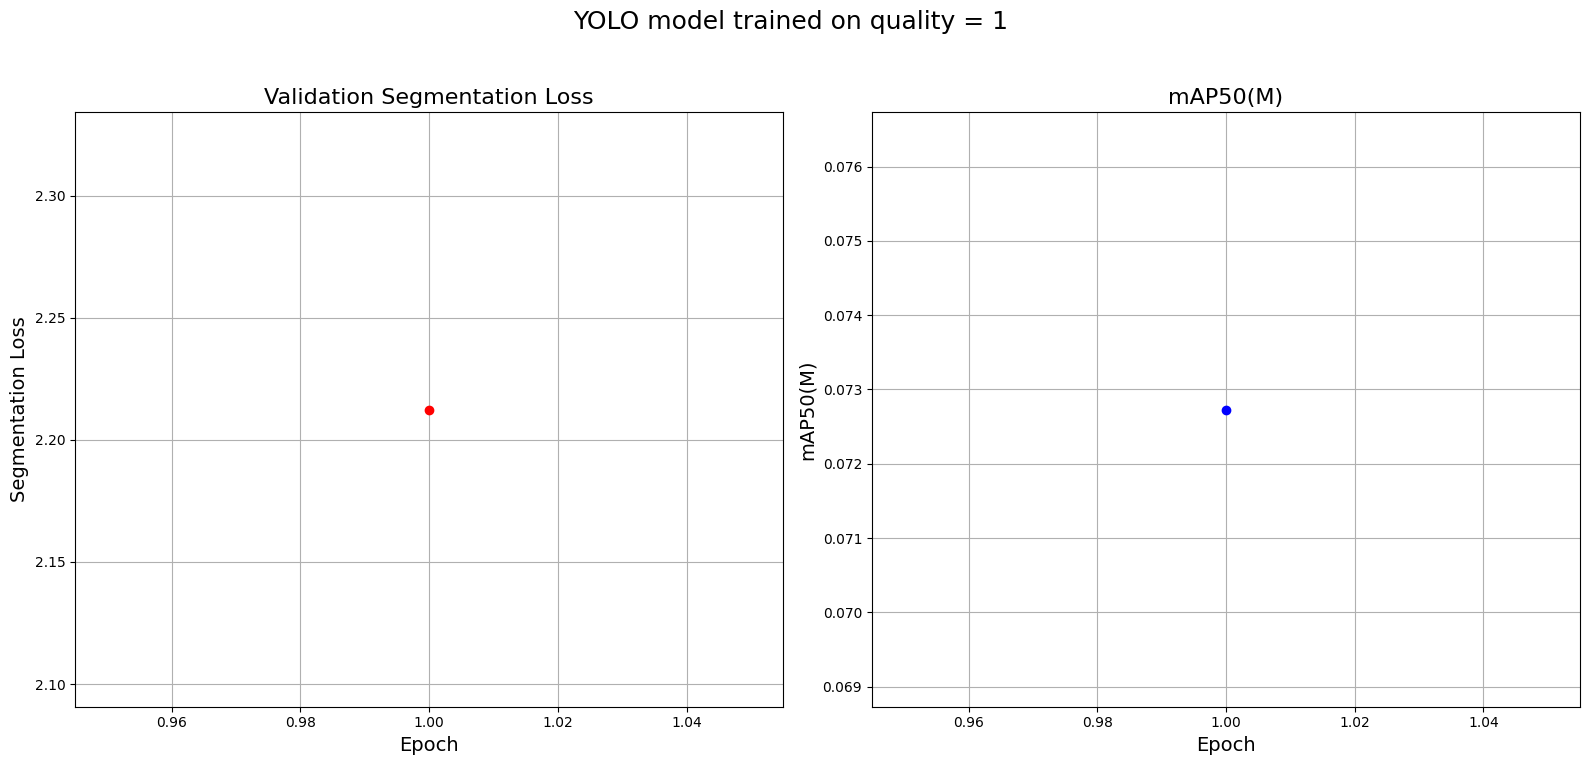

In [8]:
plot_training_data(1)

In [13]:
# # Define save directory and file paths
# q = 0
# save_directory = "{}{}{}".format("models", os.sep, "best_models_YOLO")
# YOLO_save_dir = "{}{}{}".format(save_directory, os.sep, "{}.pth".format(q))
# YOLO_jit_save_dir = "{}{}{}".format(save_directory, os.sep, "{}.pt".format(q))
# os.makedirs(save_directory, exist_ok=True)

# # Save the model
# model_YOLO.save(YOLO_save_dir)

Compress YOLO dataset


In [9]:
import shutil
import os
import yaml
# Copy function to copy YOLO masks
# def copy_files(source_dir, dest_dir):
#     # Ensure the destination directory exists
#     if not os.path.exists(dest_dir):
#         os.makedirs(dest_dir)

#     # Iterate over all files in the source directory
#     for filename in os.listdir(source_dir):
#         source_file = os.path.join(source_dir, filename)
#         dest_file = os.path.join(dest_dir, filename)
#         # Check if it is a file
#         if os.path.isfile(source_file):
#             shutil.copy(source_file, dest_file)
#             print(f"Copied {filename} to {dest_dir}")

# for q in range(0,101,1):
#     base_dest_dir = "{}{}{}{}{}".format('excavator_dataset_YOLO',os.sep, str(q),os.sep,'masks')
#     base_source_dir = "{}{}{}".format('excavator_dataset_YOLO',os.sep,'masks')
#     statuses = ['train', 'val', 'test']
#     for status in statuses:
#         dest_dir = os.path.join(base_dest_dir, status)
#         source_dir = os.path.join(base_source_dir,status)
#         os.makedirs(dest_dir, exist_ok=True)
#         copy_files(source_dir, dest_dir)
        

def create_yaml(q, directory):
    data = {
    'path': '../excavator_dataset_yolo',
    'train': str(q)+"/images/train",
    'val': str(q)+"/images/val",
    'test': str(q)+"/images/test",
    'names': {
        0: 'background',
        1: 'bulldozer',
        2: 'car',
        3: 'caterpillar',
        4: 'crane',
        5: 'crusher',
        6: 'driller',
        7: 'excavator',
        8: 'human',
        9: 'roller',
        10: 'tractor',
        11: 'truck',   # class names
        # Add more classes as needed
    },
    }
    filename = 'excavators.yaml'
    file_path = os.path.join(directory, filename)

    # Ensure the directory exists
    os.makedirs(directory, exist_ok=True)

    # Write to the .yaml file
    with open(file_path, 'w') as file:
        yaml.dump(data, file, default_flow_style=False)


In [9]:
# create new yaml files
# for quality_value in range(0,101,1):
#     new_folder = "{}{}{}".format("excavator_dataset_YOLO", os.sep, str(quality_value))
#     create_yaml(quality_value, new_folder)

In [15]:
# def compress_YOLO_dataset(image_raw_path, status):
#     base_folder = "{}".format("excavator_dataset_YOLO")
#     labels_base_folder = "{}{}{}{}{}".format("excavator_dataset_YOLO", os.sep, "labels", os.sep, status)
#     for quality_value in range(0,101,1):
#         quality_dir = os.path.join(base_folder, str(quality_value))
#         os.makedirs(quality_dir, exist_ok=True)
#         for image_file_name in os.listdir(image_raw_path):
#             image_path = os.path.join(image_raw_path, image_file_name)
#             if not image_file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
#                 print(f"Skipping {image_file_name}: Not a valid image file")
#                 continue

#             image = cv2.imread(image_path)
#             if image is None:
#                 print(f"Skipping {image_file_name}: Unable to read the image")
#                 continue

#             # Define the output file path
#             output_folder = os.path.join(base_folder, str(quality_value), "images", status)
#             os.makedirs(output_folder, exist_ok=True)
#             output_file_path = os.path.join(output_folder, f"{image_file_name}")
            
#             # Write the image with the specified JPEG quality
#             success = cv2.imwrite(output_file_path, image, [cv2.IMWRITE_JPEG_QUALITY, quality_value])
            
#             if not success:
#                 print(f"Failed to save {output_file_path}")
#             else:
#                 print(f"Saved {output_file_path} with quality {quality_value}")
#         #  copy labels
#         labels_base_folder = "{}{}{}{}{}".format("excavator_dataset_YOLO", os.sep, "labels", os.sep, status)
#         labels_new_folder = "{}{}{}{}{}{}{}".format("excavator_dataset_YOLO", os.sep, str(quality_value), os.sep, "labels", os.sep, status)
#         copy_files(labels_base_folder,labels_new_folder)
        
#         #create .yaml file
#         new_folder = "{}{}{}".format("excavator_dataset_YOLO", os.sep, str(quality_value))
#         create_yaml(quality_value, new_folder)

    
            

In [16]:
# test_images_path = "{}{}{}{}{}".format("excavator_dataset_YOLO", os.sep, "images", os.sep, "test")
# compress_YOLO_dataset(val_images_path, "test")

In [17]:
# val_images_path = "{}{}{}{}{}".format("excavator_dataset_YOLO", os.sep, "images", os.sep, "val")
# compress_YOLO_dataset(val_images_path, "val")

In [18]:
# images_path = "{}{}{}{}{}".format("excavator_dataset_YOLO", os.sep, "images", os.sep, "train")
# compress_YOLO_dataset(images_path, "train")

Training loop

In [14]:
def training_loop_YOLO():
    base_path = 'excavator_dataset_YOLO'
    for q in range(0,101,step_size):
        # create an instance of the yolo segmentation model
        model_YOLO = YOLO("yolov8n-seg.pt")
        # train the model
        data_path = os.path.join(base_path, str(q), "excavators.yaml")
        results = model_YOLO.train(data=data_path, epochs=EPOCHS, imgsz=640, batch = 2, name = str(q))
        save_directory = "{}{}{}".format("models", os.sep, "best_models_YOLO")
        YOLO_save_dir = "{}{}{}".format(save_directory, os.sep, "{}.pt".format(q))
        YOLO_jit_save_dir = "{}{}{}".format(save_directory, os.sep, "{}.pt".format(q))
        os.makedirs(save_directory, exist_ok=True)

        # Save the model
        model_YOLO.save(YOLO_save_dir)
        # plot and save training data
        plot_training_data(q)
        


In [15]:
# Print the name of the GPU
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))
print(torch.version.cuda)

None


New https://pypi.org/project/ultralytics/8.2.78 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.75  Python-3.11.9 torch-2.3.1+cpu CPU (AMD Ryzen 9 5900HS with Radeon Graphics)
engine\trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=excavator_dataset_YOLO\0\excavators.yaml, epochs=1, time=None, patience=100, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=03, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embe

train: Scanning C:\Users\hal3k\deeplabv3segmentation\excavator_dataset_YOLO\0\labels\train.cache... 616 images, 2 backgrounds, 0 corrupt: 100%|██████████| 616/616 [00:00<?, ?it/s]
val: Scanning C:\Users\hal3k\deeplabv3segmentation\excavator_dataset_YOLO\0\labels\val.cache... 116 images, 0 backgrounds, 0 corrupt: 100%|██████████| 116/116 [00:00<?, ?it/s]


Plotting labels to runs\segment\03\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\segment\03
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      1.634      3.641      3.908      1.664          8        640: 100%|██████████| 308/308 [03:36<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:23<00:00,  1.25it/s]


                   all        116        395      0.792     0.0649     0.0615     0.0291      0.767     0.0678     0.0465     0.0171

1 epochs completed in 0.068 hours.
Optimizer stripped from runs\segment\03\weights\last.pt, 6.8MB
Optimizer stripped from runs\segment\03\weights\best.pt, 6.8MB

Validating runs\segment\03\weights\best.pt...
Ultralytics YOLOv8.2.75  Python-3.11.9 torch-2.3.1+cpu CPU (AMD Ryzen 9 5900HS with Radeon Graphics)
YOLOv8n-seg summary (fused): 195 layers, 3,260,404 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:18<00:00,  1.55it/s]


                   all        116        395      0.794     0.0657     0.0618     0.0293      0.767     0.0678     0.0468     0.0172
             bulldozer          6          7          1          0          0          0          1          0          0          0
                   car         10         50          1          0          0          0          1          0          0          0
           caterpillar         46         70     0.0951     0.0286     0.0453     0.0168     0.0601     0.0429     0.0197    0.00598
                 crane         24         33      0.294      0.576      0.396      0.172      0.152      0.485       0.26     0.0812
               crusher         11         12          1          0     0.0014   0.000428          1          0    0.00103   0.000103
               driller          4          4          1          0          0          0          1          0   0.000894   8.94e-05
             excavator         23         56          1          0   

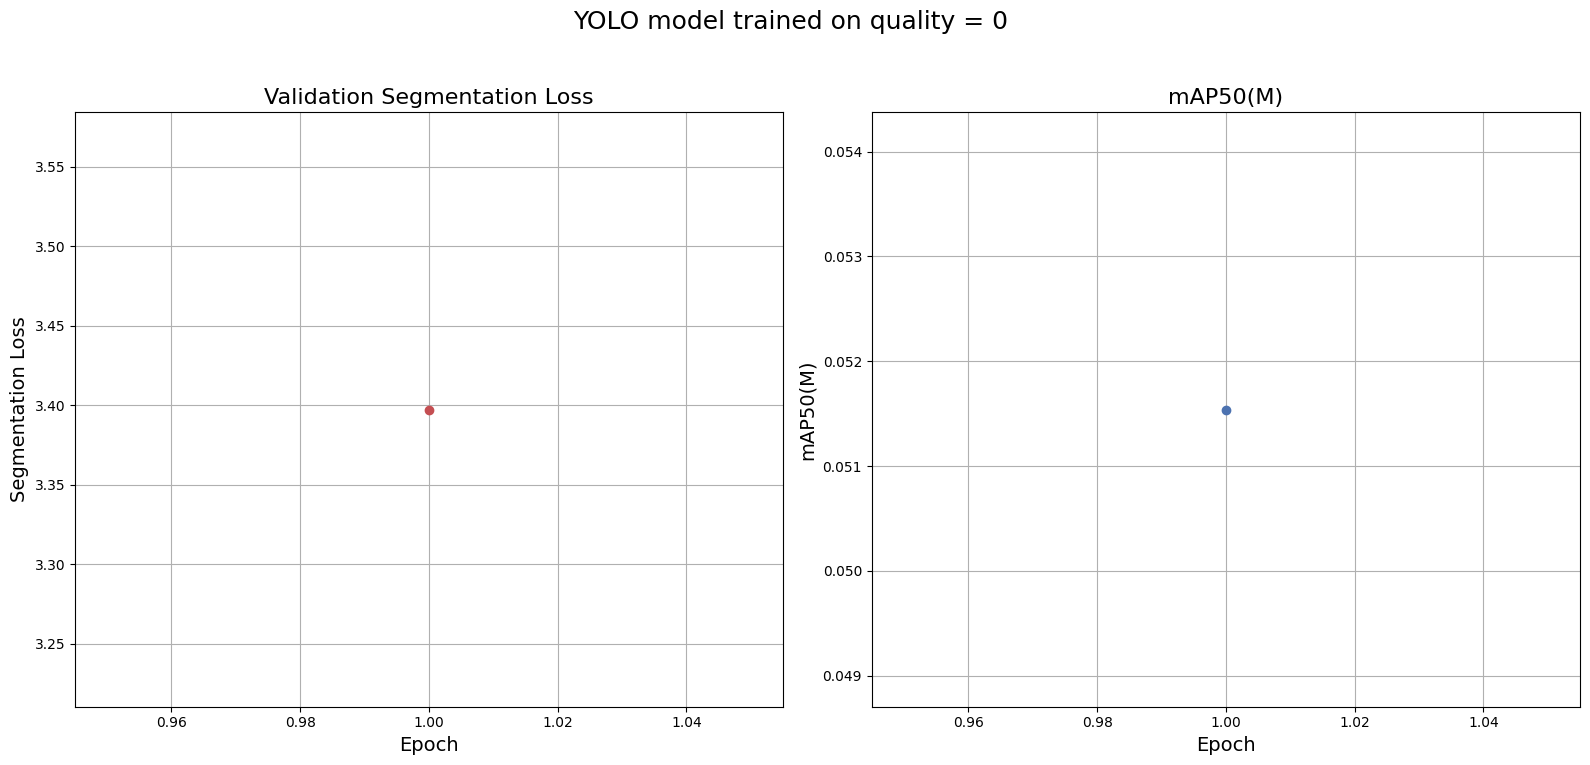

In [16]:
training_loop_YOLO()

Test one model

In [ ]:
# from sklearn.metrics import jaccard_score


# def calculate_iou(pred_mask, true_mask):
#     # Flatten masks to 1D arrays
#     pred_mask_flat = pred_mask.flatten()
#     true_mask_flat = true_mask.flatten()
#     # Calculate IoU (Jaccard Index)
#     iou = jaccard_score(true_mask_flat, pred_mask_flat, average='macro')
#     return iou

# def test_and_calculate_iou(model, test_img_dir, test_mask_dir):
#     iou_scores = []
    
#     # Get list of test images and masks
#     test_images = sorted([f for f in os.listdir(test_img_dir) if f.endswith('.jpg')])
#     test_masks = sorted([f for f in os.listdir(test_mask_dir) if f.endswith('.png')])
    
#     for img_name, mask_name in zip(test_images, test_masks):
#         img_path = os.path.join(test_img_dir, img_name)
#         mask_path = os.path.join(test_mask_dir, mask_name)
        
#         # Load the image and mask
#         img = cv2.imread(img_path)
#         true_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        
#         # Perform inference
#         results = model.predict(source=img, save=False)
        
#         # Assuming results return masks as a numpy array
#         pred_mask = results.masks.data[0].cpu().numpy().astype(np.uint8)
        
#         # Resize prediction mask to match the ground truth mask dimensions if needed
#         pred_mask = cv2.resize(pred_mask, (true_mask.shape[1], true_mask.shape[0]), interpolation=cv2.INTER_NEAREST)
        
#         # Calculate IoU for this image
#         iou = calculate_iou(pred_mask, true_mask)
#         iou_scores.append(iou)
    
#     # Calculate the average IoU
#     avg_iou = np.mean(iou_scores)
#     print(f"Average IoU: {avg_iou}")
#     return avg_iou


# def test_YOLO():
#     model_path = "{}{}{}{}{}".format("models",os.sep,"best_models_YOLO",os.sep,"0.pt")
#     model = YOLO(model_path)
#     model.eval()
#     # loop for datasets of different quality:
#     IOUs = []
#     for i in range(0,101,1):
#         masks_path = "{}{}{}{}{}".format("excavator_dataset_YOLO",os.sep, str(i) , os.sep,'labels', 'test')
#         images_path = "{}{}{}{}{}".format("excavator_dataset_YOLO",os.sep, str(i) , os.sep,'images', 'test')
#         avg_iou = test_and_calculate_iou(model, images_path, masks_path)
#         IOUs.append(avg_iou)

# test_YOLO()

In [17]:
for i in range(0, 101):
    data_path = os.path.join("excavator_dataset_YOLO", str(i), 'excavators.yaml')
    if not os.path.exists(data_path):
        print(f"Data path {data_path} does not exist")

In [23]:
from ultralytics import YOLO

def test_YOLO():
    model_path = "{}{}{}{}{}".format("models",os.sep,"best_models_YOLO",os.sep,"0.pt")
    print(model_path)
    model = YOLO(model_path)
    data_path = 'excavators.yaml'
    results = model.val(data = data_path,  split='test', project = "tests" +str(0))
    # loop for datasets of different quality:
    IOUs = []
    # for i in range(0,101,1):
    #     data_path = "{}{}{}{}{}".format("excavator_dataset_YOLO",os.sep, str(i) , os.sep,'excavators.yaml')
    #     results = model.val(data = data_path,  split='test', project = "tests" +str(0), name = str(i))
    #     print(results)

# test_YOLO()

Test models

In [27]:
def test_YOLO_loop():
    for q in range (0,101, step_size):
        # load the model
        model_path = "{}{}{}{}{}".format('models', os.sep,'best_models_YOLO',os.sep,"{}.pt".format(q))
        print(model_path)
        model =  YOLO(model_path)
        i = q
        # Path to your dataset's images
        image_dir = "{}{}{}{}{}{}{}".format("excavator_dataset_YOLO",os.sep,str(i), os.sep, 'images', os.sep, 'test')
        print(image_dir)
        # List all images in the directory
        image_files = [os.path.join(image_dir, img) for img in os.listdir(image_dir) if img.endswith(('.jpg', '.png'))]

        # Run inference on each image
        for image_path in image_files:
            results = model.val(data = data_path,  split='test', project = "tests" +str(0))
            
            # Show or save results
            print(results) # To visualize the result
            # results.save("output_directory")  # To save the result in an output directory

test_YOLO()       

models\best_models_YOLO\0.pt
Ultralytics YOLOv8.2.75  Python-3.11.9 torch-2.3.1+cpu CPU (AMD Ryzen 9 5900HS with Radeon Graphics)
YOLOv8n-seg summary (fused): 195 layers, 3,260,404 parameters, 0 gradients, 12.0 GFLOPs


FileNotFoundError: [34m[1mval: [0mError loading data from None
See https://docs.ultralytics.com/datasets for dataset formatting guidance.